# A Machine Learning Based Approach To Classify Transmission Line Disturbances From Phasor Measurement Unit (PMU) Data with explainable AI (XAI)

## Short circuit fault analysis has been performed to categorize faults in electrical transmission line.

### There are two categories of short circuit faults, such as

###    Symmetrical Faults (Three Phase Faults):

         -Line to line to line to ground (L-L-L-G)
         -Line to line to line (L-L-L)

###    Unsymmetrical Faults (Single  & Double Line Faults):

         -Line to ground (L-G)
         -Line to line (L-L)
         -Double line to ground (LL-G)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# To set 300 DPI for eacg figure

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Importing Dataset
PMU_Class = pd.read_csv('/content/PMU_Fault_Data.csv')

# Data Wrangling

In [ ]:
# Visualizing top 5 rows from the Dataset
PMU_Class.head()

time_stamp           Ia           Ib           Ic          Va  \
0  0.000000e+00  1963.798615 -8897.985690  6934.187075   64.010540   
1  3.160000e-30  1963.798615 -8897.985690  6934.187075   64.010540   
2  3.125000e-04  2849.984363 -9136.332309  6286.347925   92.337771   
3  6.250000e-04  3708.810435 -9286.742028  5577.931566  119.778538   
4  9.375000e-04  4531.982598 -9347.752715  4815.770110  146.067826   

           Vb          Vc   Im   Vm  Pai  Pav    Fi    Fv fault_types  
0 -285.098287  221.087747  1.0  1.0  0.0  0.0  50.0  50.0          NF  
1 -285.098287  221.087747  1.0  1.0  0.0  0.0  50.0  50.0          NF  
2 -292.611899  200.274127  1.0  1.0  0.0  0.0  50.0  50.0          NF  
3 -297.309131  177.530592  1.0  1.0  0.0  0.0  50.0  50.0          NF  
4 -299.144311  153.076485  1.0  1.0  0.0  0.0  50.0  50.0          NF

In [ ]:
# Dataset size
print(f"The Dataset to be classified has {PMU_Class.shape[0]} rows and {PMU_Class.shape[1]} columns.")

The Dataset to be classified has 134406 rows and 14 columns.


In [ ]:
# Null values
PMU_Class.isnull().sum()

time_stamp     0
Ia             0
Ib             0
Ic             0
Va             0
Vb             0
Vc             0
Im             0
Vm             0
Pai            0
Pav            0
Fi             0
Fv             0
fault_types    0
dtype: int64

In [ ]:
# Null values identification
PMU_Class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134389 entries, 0 to 134405
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time_stamp   134389 non-null  float64
 1   Ia           134389 non-null  float64
 2   Ib           134389 non-null  float64
 3   Ic           134389 non-null  float64
 4   Va           134389 non-null  float64
 5   Vb           134389 non-null  float64
 6   Vc           134389 non-null  float64
 7   Im           134389 non-null  float64
 8   Vm           134389 non-null  float64
 9   Pai          134389 non-null  float64
 10  Pav          134389 non-null  float64
 11  Fi           134389 non-null  float64
 12  Fv           134389 non-null  float64
 13  fault_types  134389 non-null  object 
dtypes: float64(13), object(1)
memory usage: 19.4+ MB


In [ ]:
# Dataset description
PMU_Class.describe()

time_stamp             Ia             Ib             Ic  \
count  134390.000000  134390.000000  134390.000000  134390.000000   
mean        2.859476      72.363296     -37.293059       1.515961   
std         1.654377   15224.489933   13181.575437   15153.212190   
min         0.000000  -30380.029930  -32528.019110  -47292.015040   
25%         1.427578   -8620.070191   -5075.492571   -5919.742042   
50%         2.857344      -1.340661       1.350000       4.500513   
75%         4.286875    8708.434522    5041.602653    6270.076480   
max         5.891563   45400.000000   30274.534930   35071.315730   

                 Va            Vb            Vc             Im             Vm  \
count  1.343900e+05  1.343900e+05  1.343900e+05  134390.000000  134390.000000   
mean   4.196099e-01 -6.525879e-01  3.140326e-01   15835.800571      63.009355   
std    5.893277e+01  8.523387e+01  9.308671e+01   11696.812897      63.553905   
min   -1.721403e+02 -2.850983e+02 -2.990000e+02       1.000000       1.000000   
25%   -1.702677e+01 -1.643313e+01 -1.687914e+01     461.027895      10.729066   
50%    1.460000e-08 -1.140000e-08  5.700000e-09   17914.345980      25.719947   
75%    1.772928e+01  1.613777e+01  1.692613e+01   26523.655340     147.464701   
max    1.803447e+02  2.788313e+02  2.988432e+02   31909.726920     160.398965   

                Pai            Pav             Fi             Fv  
count  1.343900e+05  134390.000000  134390.000000  134390.000000  
mean  -4.572819e+01     -32.388257      49.999460      49.999477  
std    9.504077e+00      26.387018       0.019426       0.017109  
min   -9.754301e+01     -97.588075      49.667969      49.666520  
25%   -5.104886e+01     -48.358850      50.000000      49.999999  
50%   -4.753779e+01     -46.935253      50.000000      50.000000  
75%   -3.523987e+01       0.635300      50.000001      50.000001  
max    1.530000e-13      14.205851      50.256411      50.252095

In [ ]:
# Identify duplication
print(f"Dataset Classify has {PMU_Class.duplicated().sum()} duplicate values.")

Dataset Classify has 17 duplicate values.


In [ ]:
# Clearing duplicate values
PMU_Class.drop_duplicates(keep = 'first',inplace = True)

In [ ]:
# Identify duplication
print(f"Dataset Classify has {PMU_Class.duplicated().sum()} duplicate values.")

Dataset Classify has 0 duplicate values.


In [ ]:
# Updated dataset size
PMU_Class.shape

(134389, 14)

# Feature Engineering

In [ ]:
# Categorizing differnt faults
NF = PMU_Class[PMU_Class['fault_types']=='NF']
LG = PMU_Class[PMU_Class['fault_types']=='LG']
LL = PMU_Class[PMU_Class['fault_types']=='LL']
LLG = PMU_Class[PMU_Class['fault_types']=='LLG']
LLL = PMU_Class[PMU_Class['fault_types']=='LLL']
LLLG = PMU_Class[PMU_Class['fault_types']=='LLLG']

In [ ]:
# Separating data
No_Fault = PMU_Class[PMU_Class['fault_types']=='NF']
Fault = PMU_Class[PMU_Class['fault_types']!=('NF')]

<Axes: xlabel='fault_types', ylabel='count'>

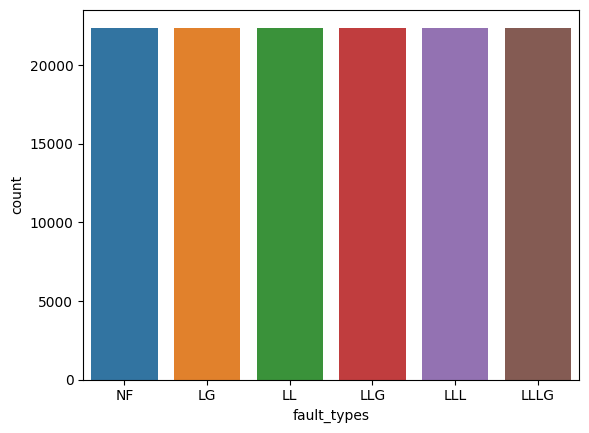

In [ ]:
# Data distribution
sns.countplot(x = PMU_Class["fault_types"])

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Phase Angle

(0.0, 0.2)

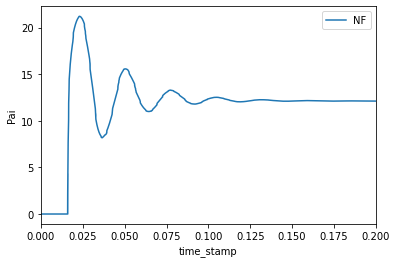

In [ ]:
# Phase Angle under NF condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=NF, label='NF')
ax.set_xlim([0,0.2])

(0.0, 0.2)

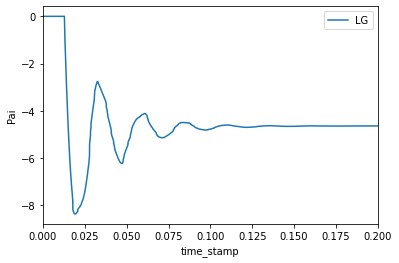

In [ ]:
# Phase Angle under LG fault condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=LG, label='LG')
ax.set_xlim([0,0.2])

(0.0, 0.2)

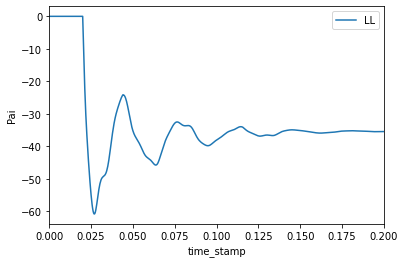

In [ ]:
# Phase Angle under LL fault condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=LL, label='LL')
ax.set_xlim([0,0.2])

(0.0, 0.2)

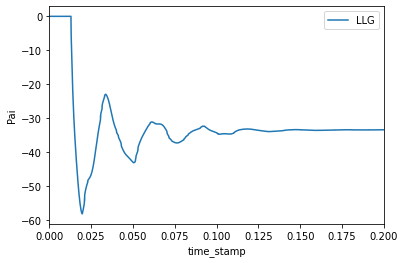

In [ ]:
# Phase Angle under LLG fault condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=LLG, label='LLG')
ax.set_xlim([0,0.2])

(0.0, 0.2)

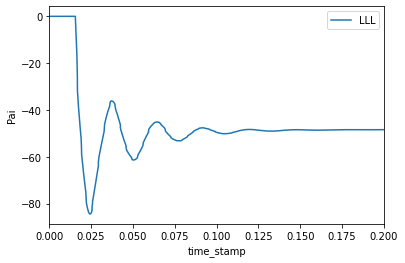

In [ ]:
# Phase Angle under LLL fault condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=LLL, label='LLL')
ax.set_xlim([0,0.2])

(0.0, 0.2)

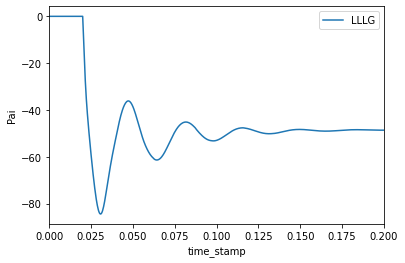

In [ ]:
# Phase Angle under LLLG fault condition

ax = sns.lineplot(x='time_stamp', y='Pai', data=LLLG, label='LLLG')
ax.set_xlim([0,0.2])

### Frequency

(0.0, 0.2)

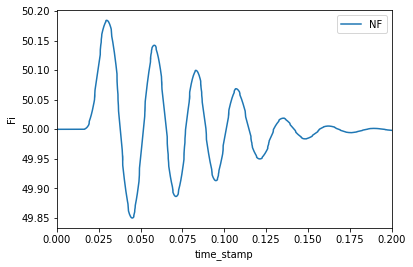

In [ ]:
# Frequency under NF condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=NF, label='NF')
ax.set_xlim([0,0.2])

(0.0, 0.2)

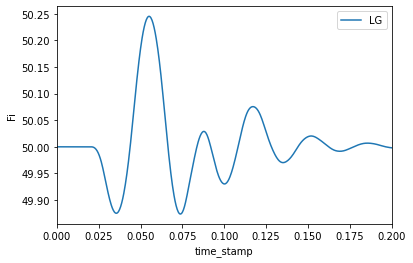

In [ ]:
# Frequency under LG condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=LG, label='LG')
ax.set_xlim([0,0.2])

(0.0, 0.2)

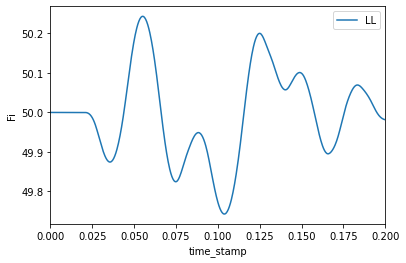

In [ ]:
# Frequency under LL condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=LL, label='LL')
ax.set_xlim([0,0.2])

(0.0, 0.2)

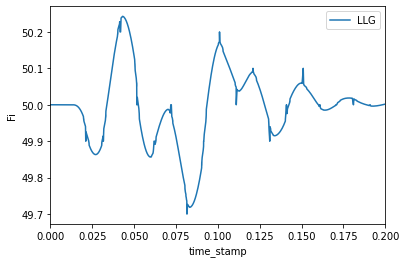

In [ ]:
# Frequency under LLG condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=LLG, label='LLG')
ax.set_xlim([0,0.2])

(0.0, 0.2)

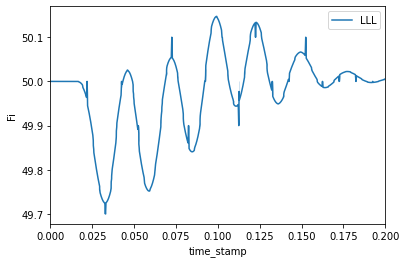

In [ ]:
# Frequency under LLL condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=LLL, label='LLL')
ax.set_xlim([0,0.2])

(0.0, 0.2)

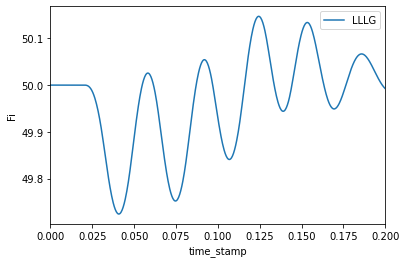

In [ ]:
# Frequency under LLLG condition
import seaborn as sns

ax = sns.lineplot(x='time_stamp', y='Fi', data=LLLG, label='LLLG')
ax.set_xlim([0,0.2])

## Multivariate Analysis

### Voltage & Current

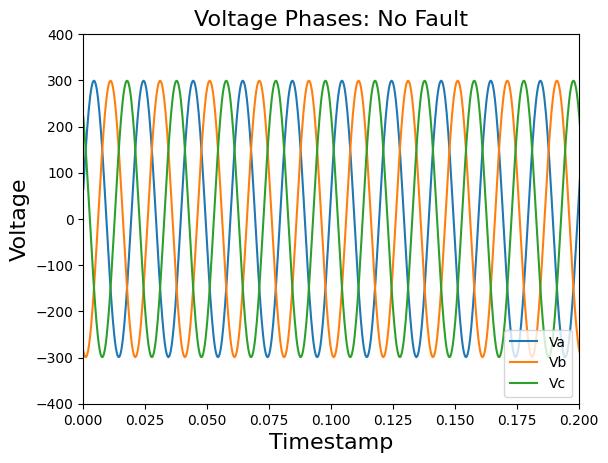

In [ ]:
# Voltage phases under no NF condition

ax = sns.lineplot(x='time_stamp', y='Va', data=NF, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=NF, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=NF, label='Vc')

plt. title('Voltage Phases: No Fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-400,400])
plt.legend(loc="lower right")
plt.show()

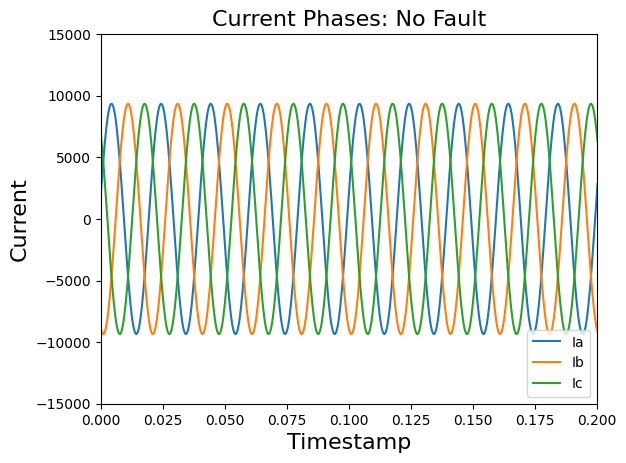

In [ ]:
# Current phases under NF condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=NF, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=NF, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=NF, label='Ic')

plt. title('Current Phases: No Fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-15000,15000])
plt.legend(loc="lower right")
plt.show()

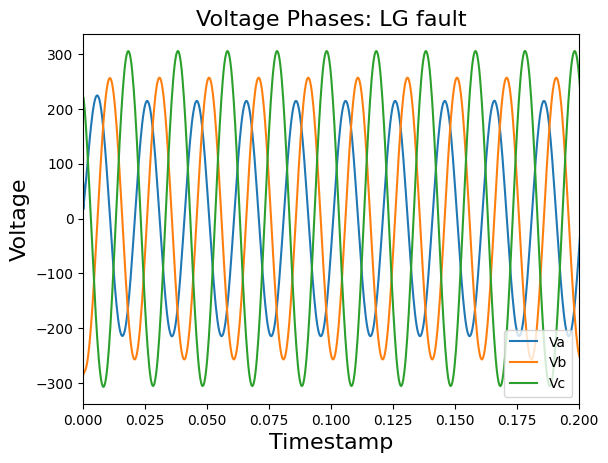

In [ ]:
# Voltage phases under LG fault condition

ax = sns.lineplot(x='time_stamp', y='Va', data=LG, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=LG, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=LG, label='Vc')


plt. title('Voltage Phases: LG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

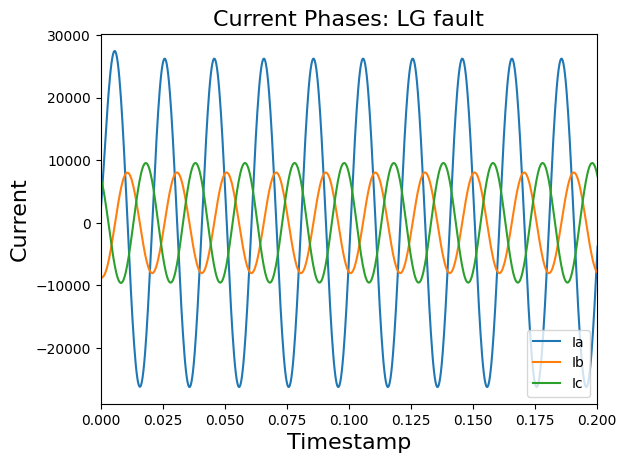

In [ ]:
# Current phases under LG fault condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=LG, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=LG, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=LG, label='Ic')

plt. title('Current Phases: LG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

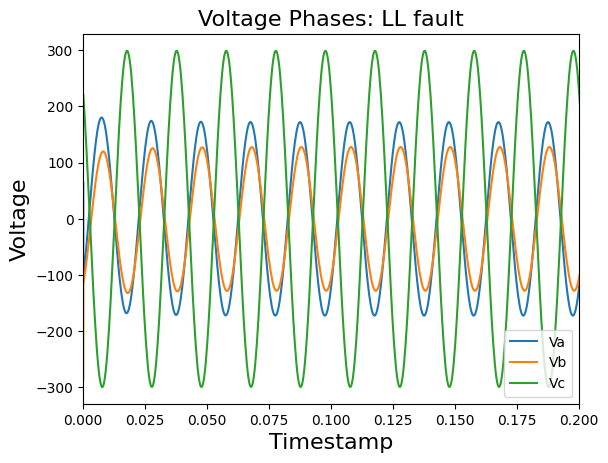

In [ ]:
# Voltage phases under LL fault condition

ax = sns.lineplot(x='time_stamp', y='Va', data=LL, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=LL, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=LL, label='Vc')

plt. title('Voltage Phases: LL fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

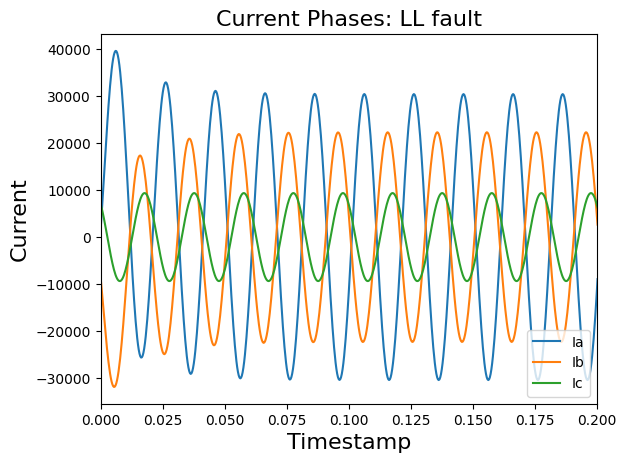

In [ ]:
# Current phases under LL fault condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=LL, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=LL, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=LL, label='Ic')

plt. title('Current Phases: LL fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

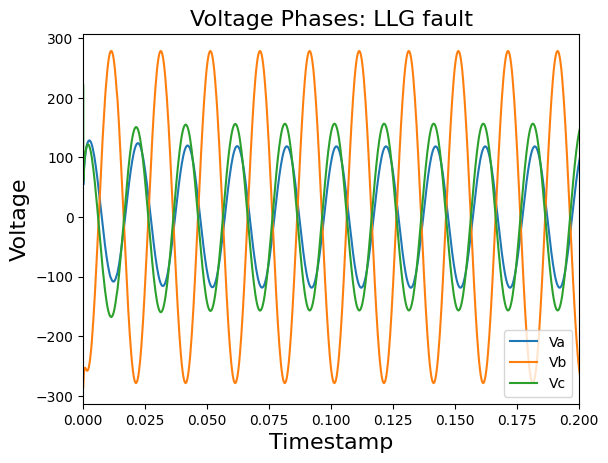

In [ ]:
# Voltage phases under LLG fault condition

ax = sns.lineplot(x='time_stamp', y='Va', data=LLG, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=LLG, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=LLG, label='Vc')

plt. title('Voltage Phases: LLG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

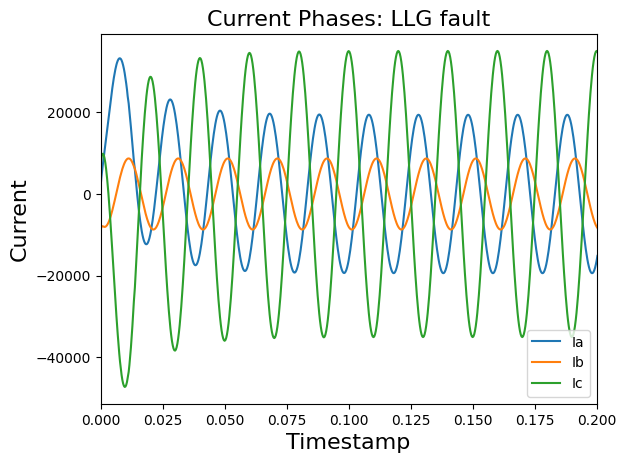

In [ ]:
# Current phases under LLG fault condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=LLG, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=LLG, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=LLG, label='Ic')

plt. title('Current Phases: LLG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
plt.legend(loc="lower right")
plt.show()

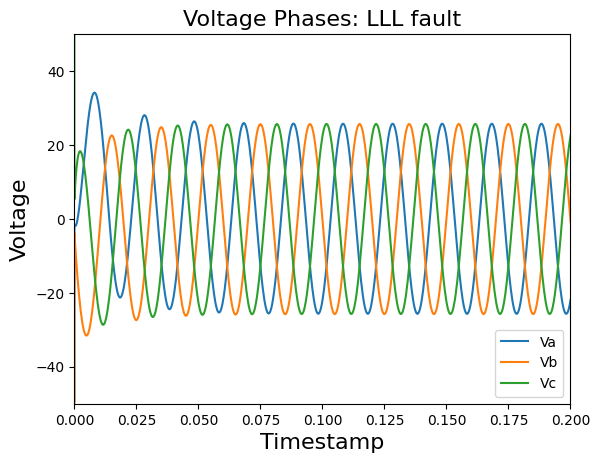

In [ ]:
# Voltage phases under LLL fault condition

ax = sns.lineplot(x='time_stamp', y='Va', data=LLL, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=LLL, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=LLL, label='Vc')

plt. title('Voltage Phases: LLL fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-50,50])
plt.legend(loc="lower right")
plt.show()

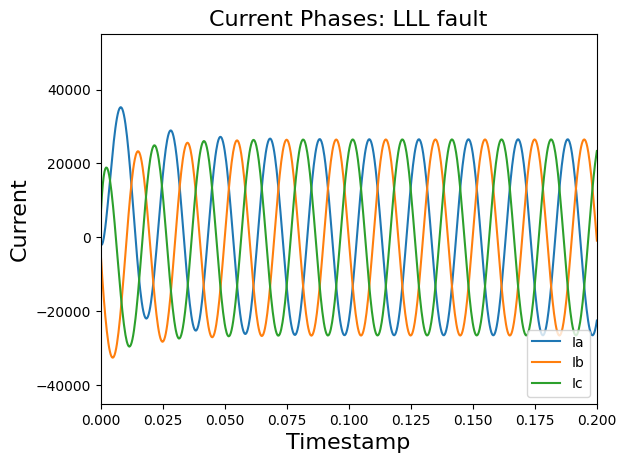

In [ ]:
# Current phases under LLL fault condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=LLL, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=LLL, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=LLL, label='Ic')

plt. title('Current Phases: LLL fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-45000,55000])
plt.legend(loc="lower right")
plt.show()

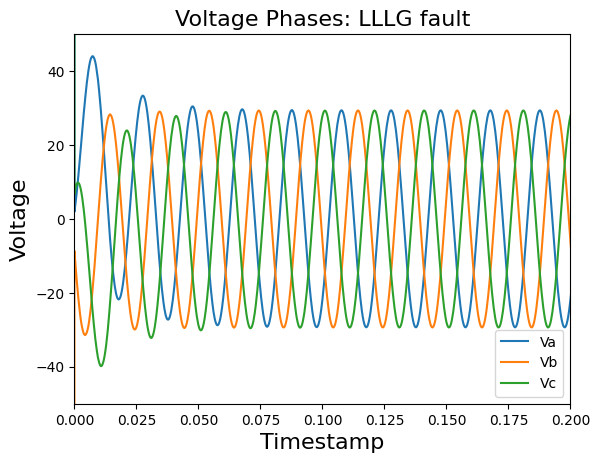

In [ ]:
# Voltage phases under LLLG fault condition

ax = sns.lineplot(x='time_stamp', y='Va', data=LLLG, label='Va')
ax = sns.lineplot(x='time_stamp', y='Vb', data=LLLG, label='Vb')
ax = sns.lineplot(x='time_stamp', y='Vc', data=LLLG, label='Vc')

plt. title('Voltage Phases: LLLG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Voltage', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-50,50])
plt.legend(loc="lower right")
plt.show()

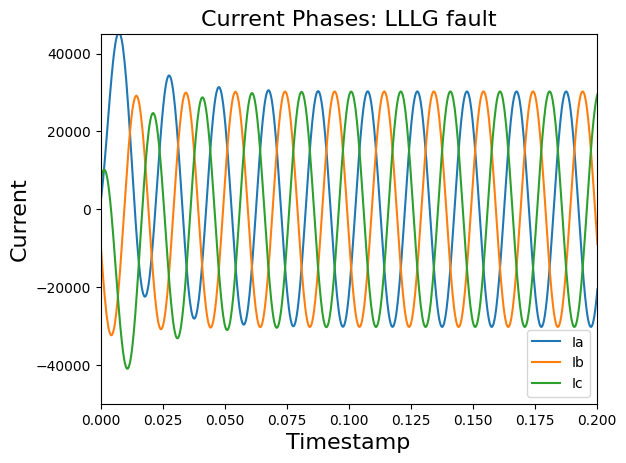

In [ ]:
# Current phases under LLLG fault condition

ax = sns.lineplot(x='time_stamp', y='Ia', data=LLLG, label='Ia')
ax = sns.lineplot(x='time_stamp', y='Ib', data=LLLG, label='Ib')
ax = sns.lineplot(x='time_stamp', y='Ic', data=LLLG, label='Ic')

plt. title('Current Phases: LLLG fault', fontsize=16)
plt. xlabel('Timestamp', fontsize=16)
plt. ylabel('Current', fontsize=16)
ax.set_xlim([0,0.2])
ax.set_ylim([-50000,45000])
plt.legend(loc="lower right")
plt.show()

### Voltage & Current Distribution

From the analysis, we can see in terms of no fault codition dtribution for voltage & currents is normal but in terms of faults it is not normal.

Va: -1.7309366539865564e-05
-1.52904907376635
Vb: -8.556013644026133e-05
-1.435478722485277
Vc: 8.188898568330708e-05
-1.5325464368157176
----------------------------------------------------------------------------------------------------


<ipython-input-57-dc19b8b56aa4>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(No_Fault['Va'])
<ipython-input-57-dc19b8b56aa4>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(No_Fault['Vb'])
<ipython-input-57-dc19b8b56aa4>:12: UserWarning: 

`distplot` is a deprecated function and will be r

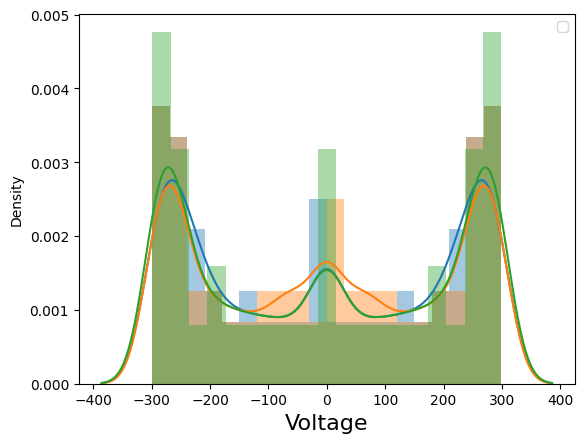

In [ ]:
# Voltages under no fault condition

print('Va:',No_Fault['Va'].skew())
print(No_Fault['Va'].kurt())
print('Vb:',No_Fault['Vb'].skew())
print(No_Fault['Vb'].kurt())
print('Vc:',No_Fault['Vc'].skew())
print(No_Fault['Vc'].kurt())
print('-' *100)
sns.distplot(No_Fault['Va'])
sns.distplot(No_Fault['Vb'])
sns.distplot(No_Fault['Vc'])

plt. xlabel('Voltage', fontsize=16)
plt.legend()
plt.show()

Ia: -1.8120456613102844e-05
-1.5293408597509268
Ib: -8.579795238299742e-05
-1.4349841445128393
Ic: 8.163332438166212e-05
-1.5326650865658211
----------------------------------------------------------------------------------------------------


<ipython-input-58-71bcdca03447>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(No_Fault['Ia'])
<ipython-input-58-71bcdca03447>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(No_Fault['Ib'])
<ipython-input-58-71bcdca03447>:12: UserWarning: 

`distplot` is a deprecated function and will be r

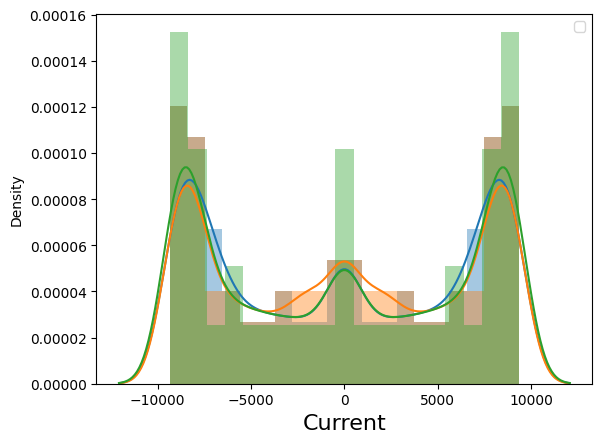

In [ ]:
# Currents under no fault condition

print('Ia:',No_Fault['Ia'].skew())
print(No_Fault['Ia'].kurt())
print('Ib:',No_Fault['Ib'].skew())
print(No_Fault['Ib'].kurt())
print('Ic:',No_Fault['Ic'].skew())
print(No_Fault['Ic'].kurt())
print('-' *100)
sns.distplot(No_Fault['Ia'])
sns.distplot(No_Fault['Ib'])
sns.distplot(No_Fault['Ic'])

plt. xlabel('Current', fontsize=16)
plt.legend()
plt.show()

Va: -0.010381561103099865
-0.06130658783215104
Vb: 0.00797005465138067
0.024983010268247785
Vc: -0.008112260317990182
0.15890316299781926
----------------------------------------------------------------------------------------------------


<ipython-input-59-fc485cbdf329>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fault['Va'])
<ipython-input-59-fc485cbdf329>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fault['Vb'])
<ipython-input-59-fc485cbdf329>:12: UserWarning: 

`distplot` is a deprecated function and will be removed

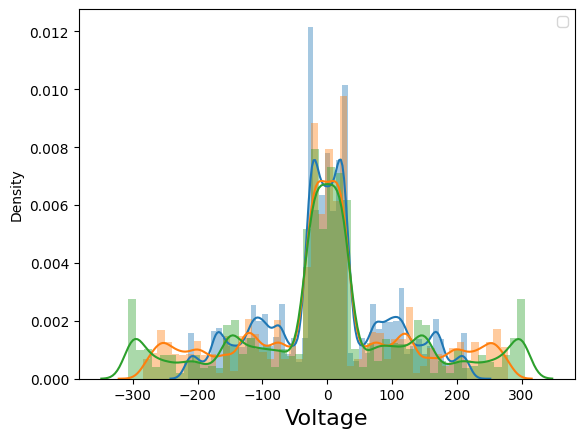

In [ ]:
# Voltages under fault condition

print('Va:',Fault['Va'].skew())
print(Fault['Va'].kurt())
print('Vb:',Fault['Vb'].skew())
print(Fault['Vb'].kurt())
print('Vc:',Fault['Vc'].skew())
print(Fault['Vc'].kurt())
print('-' *100)
sns.distplot(Fault['Va'])
sns.distplot(Fault['Vb'])
sns.distplot(Fault['Vc'])

plt. xlabel('Voltage', fontsize=16)
plt.legend()
plt.show()

Ia: -0.005692145577345117
-1.3211527499076767
Ib: 0.003863924870957924
-0.5379490600363162
Ic: -0.008294731849620185
-0.5953853619977498
----------------------------------------------------------------------------------------------------


<ipython-input-60-68653faac35e>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fault['Ia'])
<ipython-input-60-68653faac35e>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Fault['Ib'])
<ipython-input-60-68653faac35e>:12: UserWarning: 

`distplot` is a deprecated function and will be removed

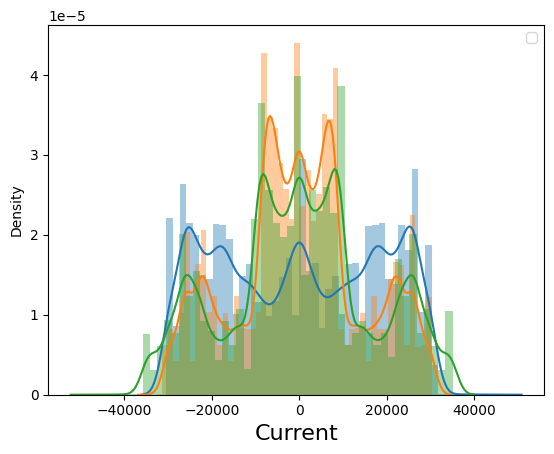

In [ ]:
# Currents under fault condition

print('Ia:',Fault['Ia'].skew())
print(Fault['Ia'].kurt())
print('Ib:',Fault['Ib'].skew())
print(Fault['Ib'].kurt())
print('Ic:',Fault['Ic'].skew())
print(Fault['Ic'].kurt())
print('-' *100)
sns.distplot(Fault['Ia'])
sns.distplot(Fault['Ib'])
sns.distplot(Fault['Ic'])

plt. xlabel('Current', fontsize=16)
plt.legend()
plt.show()

## Outliers Identification

### Normal Distribution

<Axes: >

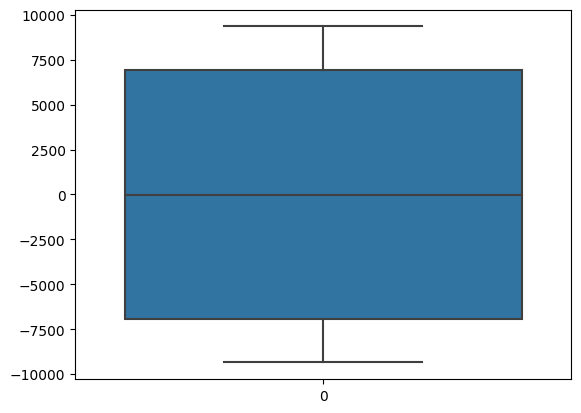

In [ ]:
# Ia
sns.boxplot(No_Fault['Ia'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ib'>

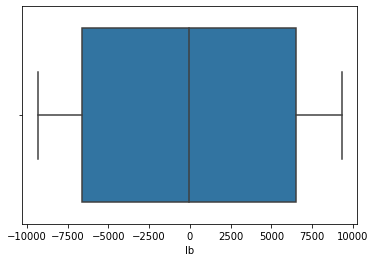

In [ ]:
# Ib
sns.boxplot(No_Fault['Ib'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ic'>

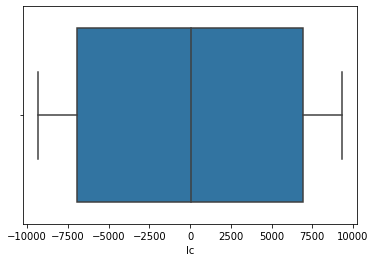

In [ ]:
#Ic
sns.boxplot(No_Fault['Ic'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Va'>

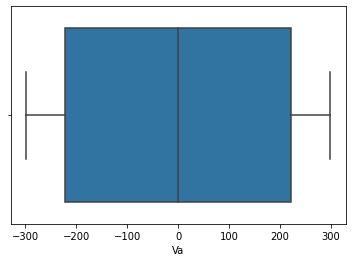

In [ ]:
# Va
sns.boxplot(No_Fault['Va'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vb'>

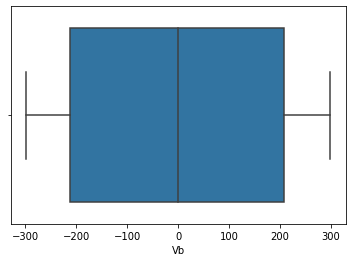

In [ ]:
# Vb
sns.boxplot(No_Fault['Vb'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vc'>

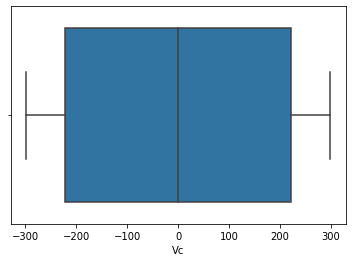

In [ ]:
# Vc
sns.boxplot(No_Fault['Vc'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pai'>

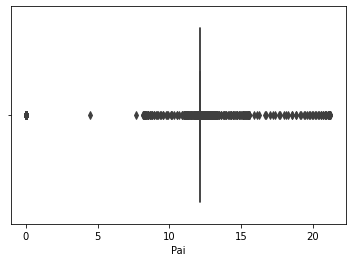

In [ ]:
# Pa
sns.boxplot(No_Fault['Pai'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fi'>

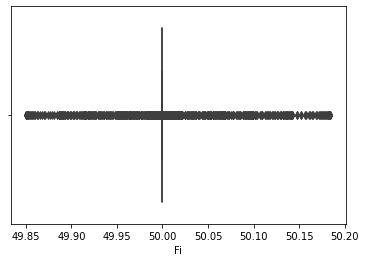

In [ ]:
# f
sns.boxplot(No_Fault['Fi'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fv'>

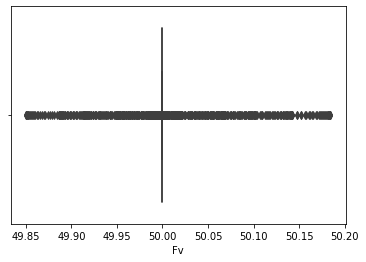

In [ ]:
# f
sns.boxplot(No_Fault['Fv'])

## Skewed Distribution

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ia'>

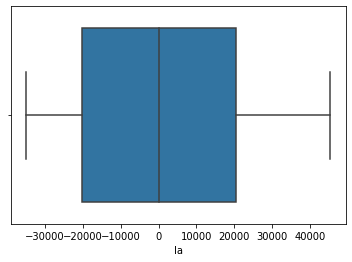

In [ ]:
# Ia
sns.boxplot(Fault['Ia'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ib'>

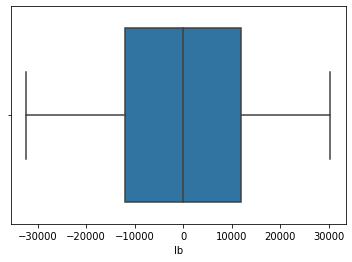

In [ ]:
# Ib
sns.boxplot(Fault['Ib'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


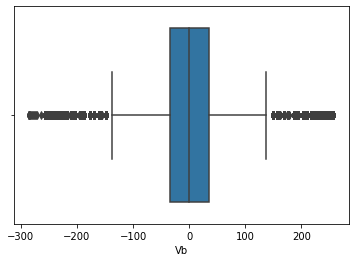

In [ ]:
# Vb
sns.boxplot(Fault['Vb'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


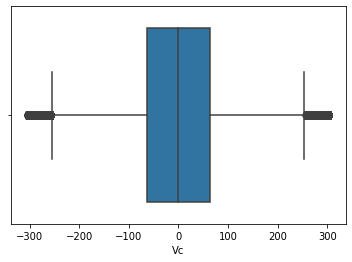

In [ ]:
# Vc
sns.boxplot(Fault['Vc'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pai'>

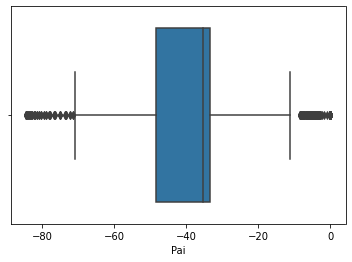

In [ ]:
# Pa
sns.boxplot(Fault['Pai'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fi'>

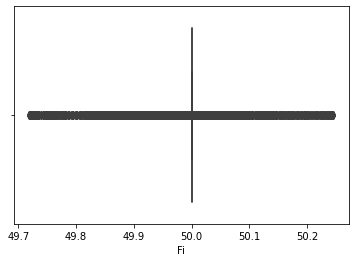

In [ ]:
# f
sns.boxplot(Fault['Fi'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fv'>

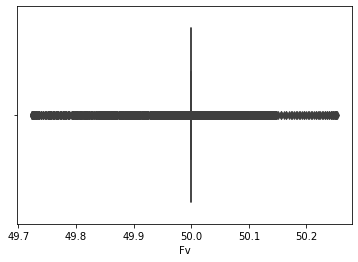

In [ ]:
# f
sns.boxplot(Fault['Fv'])

## Outliers handling using Inter Quartile Range (IQR)

In [ ]:
Fault.head()

time_stamp           Ia           Ib           Ic         Va  \
22401  0.000000e+00  1963.798615 -8897.985690  6934.187075  64.010540   
22402  3.160000e-30  1963.798615 -8897.985690  6934.187075  16.374789   
22403  2.560000e-06  1982.786401 -8897.754014  6931.680299  16.530210   
22404  5.120000e-06  1996.724114 -8896.087254  6930.598384  16.644292   
22405  8.480000e-06  2016.278124 -8894.250614  6928.807399  16.804344   

               Vb          Vc   Im   Vm  Pai  Pav    Fi    Fv fault_types  
22401 -285.098287  221.087747  1.0  1.0  0.0  0.0  50.0  50.0          LG  
22402 -285.098287  221.087748  1.0  1.0  0.0  0.0  50.0  50.0          LG  
22403 -285.089957  221.006820  1.0  1.0  0.0  0.0  50.0  50.0          LG  
22404 -285.035704  220.971489  1.0  1.0  0.0  0.0  50.0  50.0          LG  
22405 -284.975728  220.913244  1.0  1.0  0.0  0.0  50.0  50.0          LG

In [ ]:
Fault_timestamp = Fault['time_stamp']
Fault_label = Fault['fault_types']

In [ ]:
#Ic
Ic = Fault['Ic']

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(Ic, 25)
Q3 = np.percentile(Ic, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Set lower bound
lower_bound = Q1 - 1.5 * IQR

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = (Ic < lower_bound) | (Ic > upper_bound)

In [ ]:
# Removing outliers

def remove_outliers(Ic, lower_bound, upper_bound):
    return Ic[(Ic >= lower_bound) & (Ic <= upper_bound)]

Ic = remove_outliers(Ic, lower_bound, upper_bound)

In [ ]:
# Ic
Ic.head()

22401    6934.187075
22402    6934.187075
22403    6931.680299
22404    6930.598384
22405    6928.807399
Name: Ic, dtype: float64

In [ ]:
# Va
Va = Fault['Va']

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(Va, 25)
Q3 = np.percentile(Va, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Set lower bound
lower_bound = Q1 - 1.5 * IQR

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = (Va < lower_bound) | (Va > upper_bound)

In [ ]:
# Removing outliers

def remove_outliers(Va, lower_bound, upper_bound):
    return Va[(Va >= lower_bound) & (Va <= upper_bound)]

Va = remove_outliers(Va, lower_bound, upper_bound)

In [ ]:
# Vb
Vb = Fault['Vb']

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(Vb, 25)
Q3 = np.percentile(Vb, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Identify outliers
outliers = (Vb < lower_bound) | (Vb > upper_bound)

In [ ]:
# Set lower bound
lower_bound = Q1 - 1.5 * IQR

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = (Vb < lower_bound) | (Vb > upper_bound)

In [ ]:
# Removing outliers

def remove_outliers(Vb, lower_bound, upper_bound):
    return Vb[(Vb >= lower_bound) & (Vb <= upper_bound)]

Vb = remove_outliers(Vb, lower_bound, upper_bound)

In [ ]:
# Vc
Vc = Fault['Vc']

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(Vc, 25)
Q3 = np.percentile(Vc, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Identify outliers
outliers = (Vc < lower_bound) | (Vc > upper_bound)

In [ ]:
# Set lower bound
lower_bound = Q1 - 1.5 * IQR

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = (Vc < lower_bound) | (Vc > upper_bound)

In [ ]:
# Removing outliers

def remove_outliers(Vc, lower_bound, upper_bound):
    return Vc[(Vc >= lower_bound) & (Vc <= upper_bound)]

Vc = remove_outliers(Vc, lower_bound, upper_bound)

In [ ]:
# Pai
Pai = Fault['Pai']

In [ ]:
# Calculate Q1 and Q3
Q1 = np.percentile(Pai, 25)
Q3 = np.percentile(Pai, 75)

# Calculate IQR
IQR = Q3 - Q1

In [ ]:
# Identify outliers
outliers = (Pai < lower_bound) | (Pai > upper_bound)

In [ ]:
# Set lower bound
lower_bound = Q1 - 1.5 * IQR

# Set upper bound
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Identify outliers
outliers = (Pai < lower_bound) | (Pai > upper_bound)

In [ ]:
# Removing outliers

def remove_outliers(Pai, lower_bound, upper_bound):
    return Pai[(Pai >= lower_bound) & (Pai <= upper_bound)]

Pai = remove_outliers(Pai, lower_bound, upper_bound)

In [ ]:
# Separating feature column from Fault data
Ia = Fault['Ia']
Ib = Fault['Ib']
Im = Fault['Im']
Vm = Fault['Vm']
Pav = Fault['Pav']
Fi = Fault['Fi']
Fv = Fault['Fv']

In [ ]:
# Horizontally concatenating the datasets
Updated_Fault = pd.concat([Fault_timestamp, Ia, Ib, Ic, Va, Vb, Vc, Im, Vm, Pai, Pav, Fi, Fv, Fault_label], axis=1)

In [ ]:
# Vertically concatenating the datasets
PMU_Class = pd.concat([No_Fault, Updated_Fault], axis=0)

print(PMU_Class)

          time_stamp            Ia            Ib            Ic          Va  \
0       0.000000e+00   1963.798615  -8897.985690   6934.187075   64.010540   
1       3.160000e-30   1963.798615  -8897.985690   6934.187075   64.010540   
2       3.125000e-04   2849.984363  -9136.332309   6286.347925   92.337771   
3       6.250000e-04   3708.810435  -9286.742028   5577.931566  119.778538   
4       9.375000e-04   4531.982598  -9347.752715   4815.770110  146.067826   
...              ...           ...           ...           ...         ...   
134401  5.739375e+00 -25563.857150  -1263.554868  26827.412010  -24.772254   
134402  5.739486e+00 -24488.947200  -3170.595886  27659.543080  -23.729731   
134403  5.739687e+00 -22626.537950  -6106.440220  28732.978160  -21.923487   
134404  5.740000e+00 -20546.172110  -8983.610215  29529.782310  -19.905914   
134405  5.740312e+00 -18267.912480 -11774.281500  30042.193960  -17.696469   

                Vb          Vc           Im         Vm        P

In [ ]:
# Dataset size
print(f"The Dataset to be classified has {PMU_Class.shape[0]} rows and {PMU_Class.shape[1]} columns.")

The Dataset to be classified has 134406 rows and 14 columns.


In [ ]:
# Null values
PMU_Class.isnull().sum()

time_stamp         0
Ia                 0
Ib                 0
Ic                30
Va             19378
Vb             20748
Vc             21151
Im                 0
Vm                 0
Pai            22767
Pav                0
Fi                 0
Fv                 0
fault_types        0
dtype: int64

In [ ]:
# Drop outliers that converted to null values
PMU_Class = PMU_Class.dropna()

In [ ]:
# Dataset size
print(f"The Dataset to be classified has {PMU_Class.shape[0]} rows and {PMU_Class.shape[1]} columns.")

The Dataset to be classified has 92735 rows and 14 columns.


In [ ]:
PMU_Class.head()

time_stamp           Ia           Ib           Ic          Va  \
0  0.000000e+00  1963.798615 -8897.985690  6934.187075   64.010540   
1  3.160000e-30  1963.798615 -8897.985690  6934.187075   64.010540   
2  3.125000e-04  2849.984363 -9136.332309  6286.347925   92.337771   
3  6.250000e-04  3708.810435 -9286.742028  5577.931566  119.778538   
4  9.375000e-04  4531.982598 -9347.752715  4815.770110  146.067826   

           Vb          Vc   Im   Vm  Pai  Pav    Fi    Fv fault_types  
0 -285.098287  221.087747  1.0  1.0  0.0  0.0  50.0  50.0          NF  
1 -285.098287  221.087747  1.0  1.0  0.0  0.0  50.0  50.0          NF  
2 -292.611899  200.274127  1.0  1.0  0.0  0.0  50.0  50.0          NF  
3 -297.309131  177.530592  1.0  1.0  0.0  0.0  50.0  50.0          NF  
4 -299.144311  153.076485  1.0  1.0  0.0  0.0  50.0  50.0          NF

# Converting categorical features

In [ ]:
# Categorical encoding
Numeric_Data = pd.get_dummies(data = PMU_Class, columns = ['fault_types'],drop_first=True)

In [ ]:
# Categorical dataset
Numeric_Data.head()

time_stamp           Ia           Ib           Ic          Va  \
0  0.000000e+00  1963.798615 -8897.985690  6934.187075   64.010540   
1  3.160000e-30  1963.798615 -8897.985690  6934.187075   64.010540   
2  3.125000e-04  2849.984363 -9136.332309  6286.347925   92.337771   
3  6.250000e-04  3708.810435 -9286.742028  5577.931566  119.778538   
4  9.375000e-04  4531.982598 -9347.752715  4815.770110  146.067826   

           Vb          Vc   Im   Vm    Fi    Fv  Pai  Pav  fault_types_LL  \
0 -285.098287  221.087747  1.0  1.0  50.0  50.0  0.0  0.0               0   
1 -285.098287  221.087747  1.0  1.0  50.0  50.0  0.0  0.0               0   
2 -292.611899  200.274127  1.0  1.0  50.0  50.0  0.0  0.0               0   
3 -297.309131  177.530592  1.0  1.0  50.0  50.0  0.0  0.0               0   
4 -299.144311  153.076485  1.0  1.0  50.0  50.0  0.0  0.0               0   

   fault_types_LLG  fault_types_LLL  fault_types_LLLG  fault_types_NF  
0                0                0                 0               1  
1                0                0                 0               1  
2                0                0                 0               1  
3                0                0                 0               1  
4                0                0                 0               1

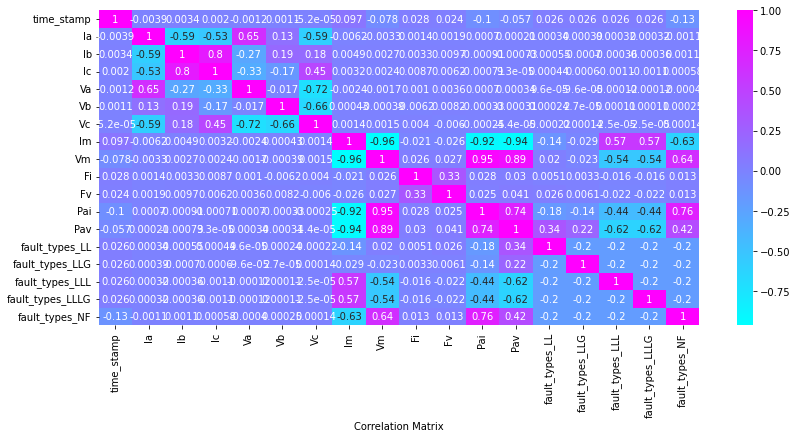

In [ ]:
# Correlation Matrix
figure = plt.figure(figsize=(12, 6))
sns.heatmap(Numeric_Data.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Correlation Matrix')
plt.show()

# Classification

Correlated features have been dropped and rest of the features have selected as training input.

In [ ]:
# input features

features = ['Ia', 'Ib','Ic','Va','Vb','Vc', 'Fi', 'Fv', 'Pai']

In [ ]:
x = PMU_Class[features] # Collection of features
y = PMU_Class['fault_types'] # Target or the labels to predict

### Apply normalization techniques (if requires)

In [ ]:
for column in x.columns:
    x[column] = x[column]  / x[column].abs().max()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
for column in x.columns:
    x[column] = (x[column] -
                           x[column].mean()) / x[column].std()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


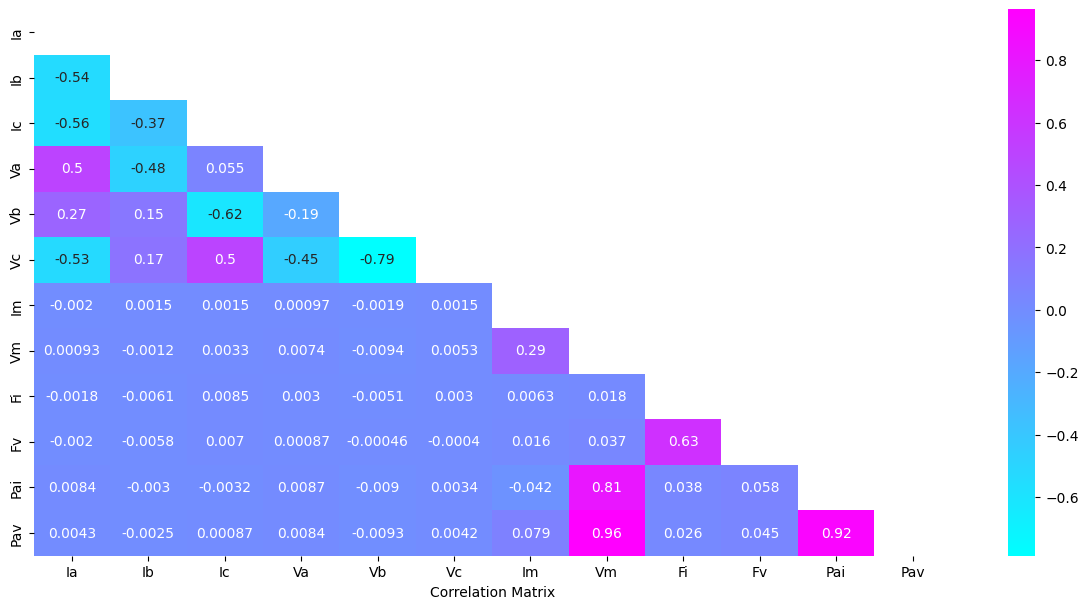

In [ ]:
# Correlation Matrix
figure = plt.figure(figsize=(12, 6), dpi=100)
mask = np.triu(np.ones_like(x.corr(), dtype=bool))
sns.heatmap(x.corr(), mask=mask, annot=True, cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Correlation Matrix')
plt.show()

In [ ]:
# Preprocessing

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y = le.fit_transform(y)

In [ ]:
# Train & Test dataset split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=25)

# x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.099, test_size=0.02, random_state=25)

In [ ]:
# Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Pipeline

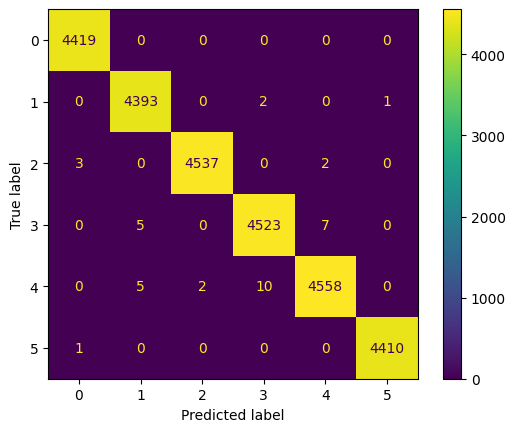

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



In [ ]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
#metrics.plot_confusion_matrix(knnclassifier,x_test, y_test)
metrics.ConfusionMatrixDisplay.from_estimator(knnclassifier,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


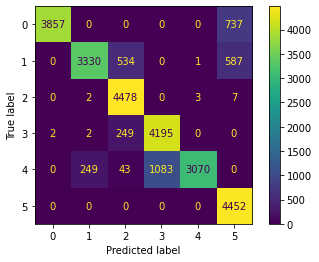

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      4594
           1       0.93      0.75      0.83      4452
           2       0.84      1.00      0.91      4490
           3       0.79      0.94      0.86      4448
           4       1.00      0.69      0.82      4445
           5       0.77      1.00      0.87      4452

    accuracy                           0.87     26881
   macro avg       0.89      0.87      0.87     26881
weighted avg       0.89      0.87      0.87     26881



In [ ]:
# Support Vector OneVsRest Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
SVC = SVC()
SVC_O_VS_R = OneVsRestClassifier(SVC)
SVC_O_VS_R.fit(x_train,y_train)
y_pred = SVC_O_VS_R.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_R,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


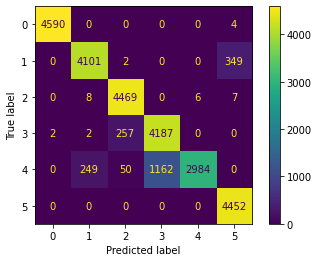

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4594
           1       0.94      0.92      0.93      4452
           2       0.94      1.00      0.96      4490
           3       0.78      0.94      0.85      4448
           4       1.00      0.67      0.80      4445
           5       0.93      1.00      0.96      4452

    accuracy                           0.92     26881
   macro avg       0.93      0.92      0.92     26881
weighted avg       0.93      0.92      0.92     26881



In [ ]:
# Support Vector OneVsOne Classifier

from sklearn.multiclass import OneVsOneClassifier
SVC_O_VS_O = OneVsOneClassifier(SVC)
SVC_O_VS_O.fit(x_train,y_train)
y_pred = SVC_O_VS_O.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_O,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

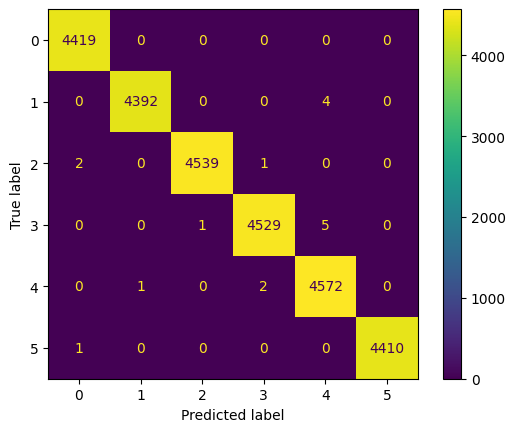

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



In [ ]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
#metrics.plot_confusion_matrix(DT,x_test, y_test)
metrics.ConfusionMatrixDisplay.from_estimator(DT,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

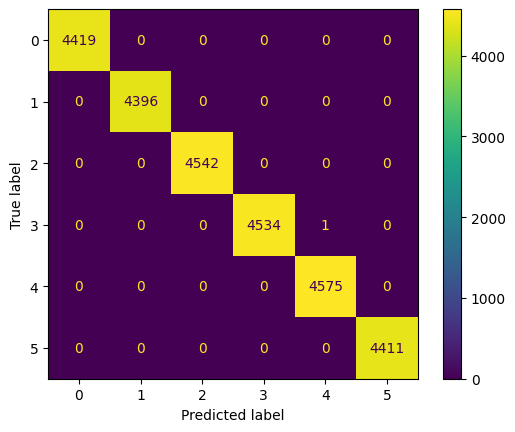

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
# metrics.plot_confusion_matrix(RF,x_test, y_test)
metrics.ConfusionMatrixDisplay.from_estimator(RF,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


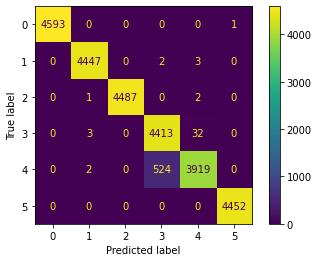

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4594
           1       1.00      1.00      1.00      4452
           2       1.00      1.00      1.00      4490
           3       0.89      0.99      0.94      4448
           4       0.99      0.88      0.93      4445
           5       1.00      1.00      1.00      4452

    accuracy                           0.98     26881
   macro avg       0.98      0.98      0.98     26881
weighted avg       0.98      0.98      0.98     26881



In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
metrics.plot_confusion_matrix(GB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

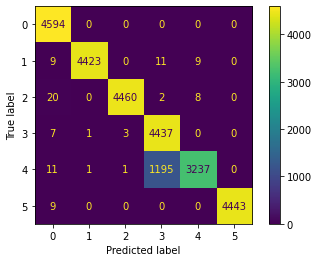

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4594
           1       1.00      0.99      1.00      4452
           2       1.00      0.99      1.00      4490
           3       0.79      1.00      0.88      4448
           4       0.99      0.73      0.84      4445
           5       1.00      1.00      1.00      4452

    accuracy                           0.95     26881
   macro avg       0.96      0.95      0.95     26881
weighted avg       0.96      0.95      0.95     26881



In [ ]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
# metrics.plot_confusion_matrix(GNB,x_test, y_test)
metrics.ConfusionMatrixDisplay.from_estimator(GNB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


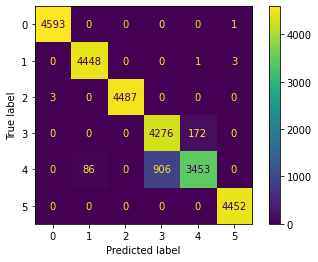

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4594
           1       0.98      1.00      0.99      4452
           2       1.00      1.00      1.00      4490
           3       0.83      0.96      0.89      4448
           4       0.95      0.78      0.86      4445
           5       1.00      1.00      1.00      4452

    accuracy                           0.96     26881
   macro avg       0.96      0.96      0.96     26881
weighted avg       0.96      0.96      0.96     26881



In [ ]:
# Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0, max_iter=300)
MLP.fit(x_train,y_train)
y_pred = MLP.predict(x_test)
metrics.plot_confusion_matrix(MLP,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

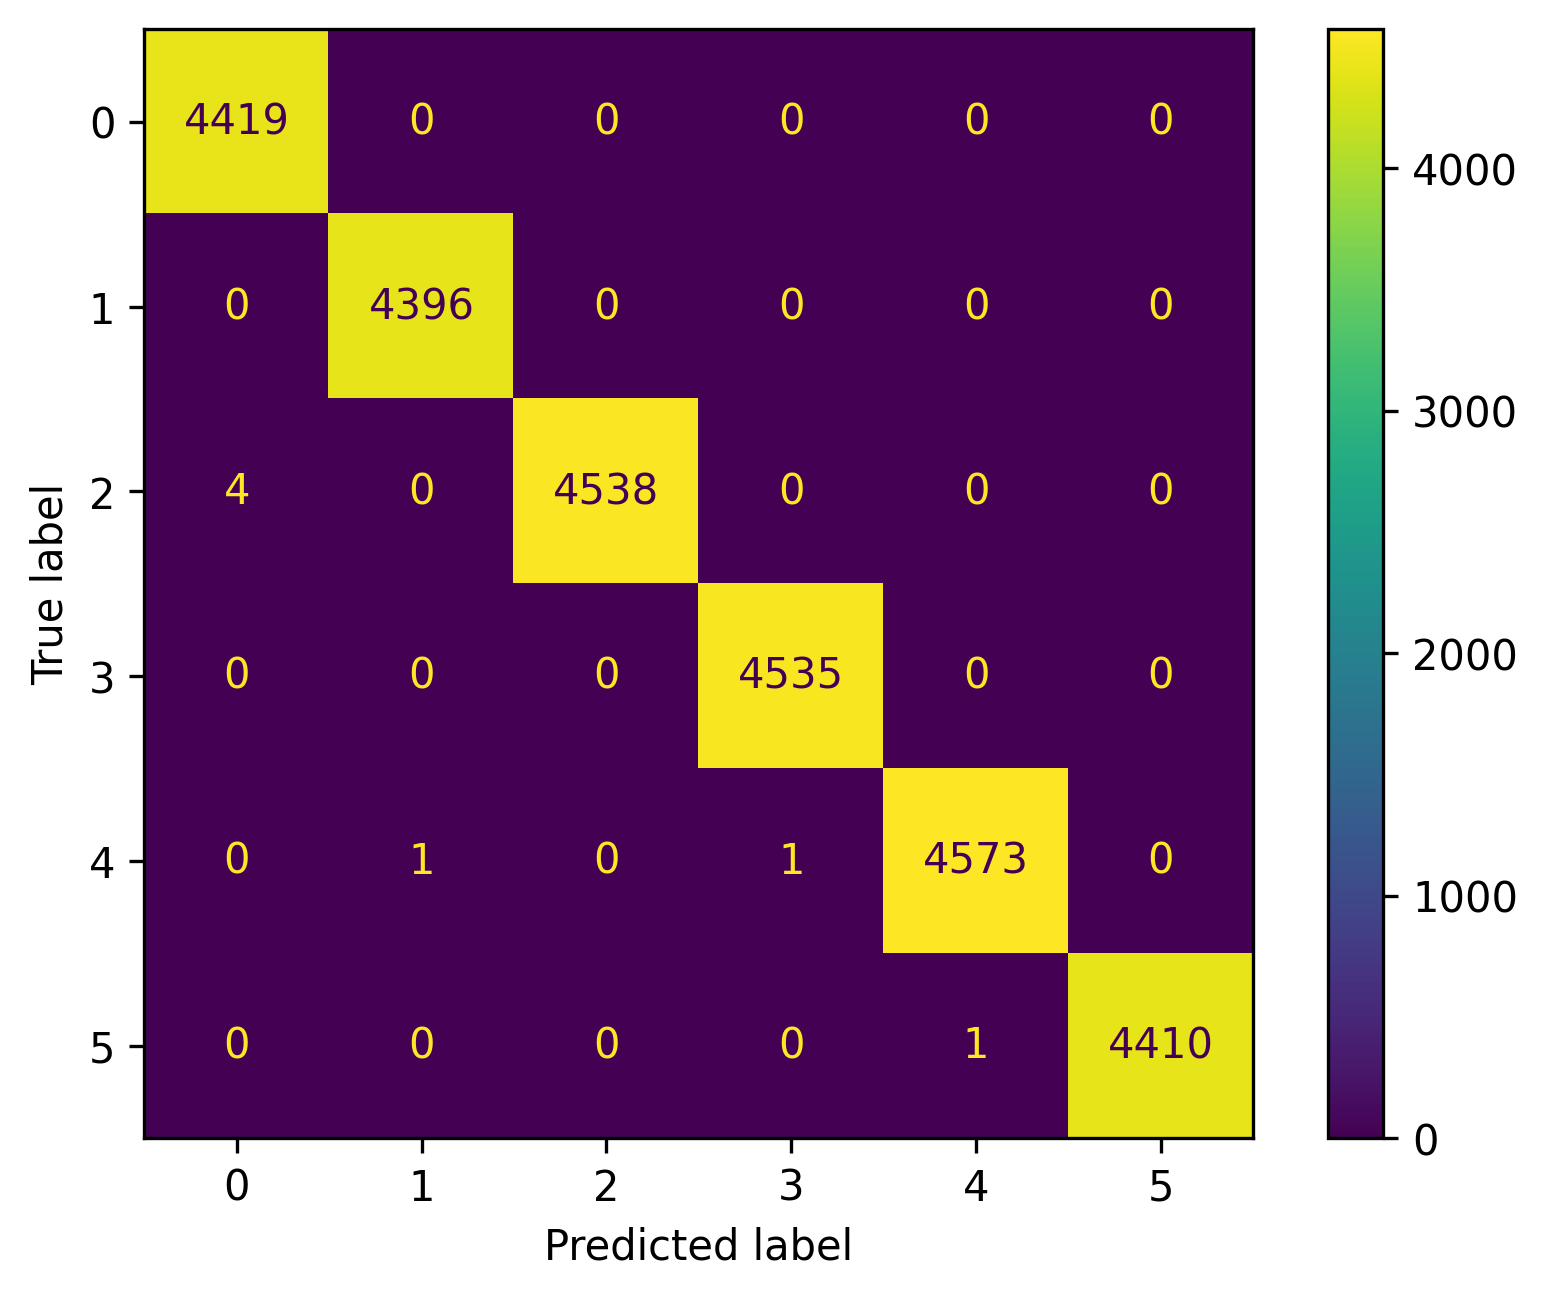

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



In [ ]:
# importing voting classifier
from sklearn.ensemble import VotingClassifier

# Making the final model using voting classifier
ensemble_model = VotingClassifier(estimators=[('KNN', knnclassifier), ('DT', DT), ('RF', RF)], voting='soft')

# training all the model on the train dataset
ensemble_model.fit(x_train, y_train)

# predicting the output on the test dataset
y_pred = ensemble_model.predict(x_test)

# metrics.plot_confusion_matrix(ensemble_model,x_test, y_test)
metrics.ConfusionMatrixDisplay.from_estimator(ensemble_model,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

# Voting report for ensemble learning

In [ ]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('DT', DecisionTreeClassifier(random_state=7)))
 models.append(('RF', RandomForestClassifier()))
 models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))

 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['DT'] = DecisionTreeClassifier(random_state=7)
 models['RF'] = RandomForestClassifier()
 models['KNN'] = KNeighborsClassifier(n_neighbors=5)

 models['soft_voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, x, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, x, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Customized receiver operating characteristic (ROC) curve for multiclass

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 6


y_score = label_binarize(y_pred, classes=range(n_classes))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## Evaluating & Comparing Models

In [ ]:
# Classifiers
names = ["knnclassifier", "SVC_O_VS_R", "SVC_O_VS_O", "DT", "RF", "GB", "GNB", "MLP", "ensemble_model"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    OneVsRestClassifier(SVC),
    OneVsOneClassifier(SVC),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=0, max_iter=300),
    VotingClassifier(estimators=[('knn', knnclassifier), ('DT', DT), ('RF', RF)], voting='hard')]

In [ ]:
from sklearn.metrics import accuracy_score

# Load accuracy score
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    validation_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(validation_score)

In [ ]:
# Load data into data frame
df = pd.DataFrame()
df['name'] = names
df['accuracy_score'] = scores

In [ ]:
# Visualizing accuracy score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

## Cross Validation Score

In [ ]:
# Classifiers
names = ["knnclassifier", "DT", "RF", "ensemble_model"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    VotingClassifier(estimators=[('knn', knnclassifier), ('DT', DT), ('RF', RF)], voting='hard')]

In [ ]:
from sklearn.model_selection import cross_val_score

# Load accuracy score
scores = []

for name, clf in zip(names, classifiers):
    Score = cross_val_score(clf, x_train, y_train, scoring='accuracy', cv=10)
    scores.append(Score.mean())

In [ ]:
# Load data into data frame
df = pd.DataFrame()
df['name'] = names
df['cross_validation_score'] = scores

In [ ]:
# Visualizing accuracy score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

## Training Accuracy

In [ ]:
# Classifiers
names = ["knnclassifier", "SVC_O_VS_R", "SVC_O_VS_O", "DT", "RF", "GB", "GNB", "MLP", "ensemble_model"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    OneVsRestClassifier(SVC),
    OneVsOneClassifier(SVC),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=0, max_iter=300),
    VotingClassifier(estimators=[('knn', knnclassifier), ('DT', DT), ('RF', RF)], voting='hard')]

In [ ]:
from sklearn.metrics import accuracy_score

# Load accuracy score
scores = []

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    validation_score = metrics.accuracy_score(y_train, y_pred)
    scores.append(validation_score)

In [ ]:
# Load data into data frame
df = pd.DataFrame()
df['name'] = names
df['train_score'] = scores

In [ ]:
# Visualizing accuracy score
cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

# Hyperparameter Tuning

## Decision Tree

### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
DT=DecisionTreeClassifier(random_state=7)
DT_randomcv=RandomizedSearchCV(estimator=DT,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=100,n_jobs=-1)

### fit the randomized model
DT_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=7),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=100, verbose=2)

In [ ]:
best_random_grid=DT_randomcv.best_estimator_

In [ ]:
# Optimal Parameters
best_random_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='auto',
                       min_samples_split=5, random_state=7)

In [ ]:
from sklearn.metrics import accuracy_score

# Prediction
y_pred=best_random_grid.predict(x_test)
print (f'Test Accuracy - : {best_random_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [DT_randomcv.best_params_['max_features']],
    'max_depth': [DT_randomcv.best_params_['max_depth']],
    'min_samples_split': [DT_randomcv.best_params_['min_samples_split'],
                          DT_randomcv.best_params_['min_samples_split'] +1,
                          DT_randomcv.best_params_['min_samples_split'] + 2],
    'min_samples_leaf': [DT_randomcv.best_params_['min_samples_leaf'],
                         DT_randomcv.best_params_['min_samples_leaf']+2,
                         DT_randomcv.best_params_['min_samples_leaf'] + 4],
    'criterion': [DT_randomcv.best_params_['criterion']],
}

print(param_grid)

{'max_features': ['auto'], 'max_depth': [560], 'min_samples_split': [5, 6, 7], 'min_samples_leaf': [1, 3, 5], 'criterion': ['entropy']}


In [ ]:
DT=DecisionTreeClassifier(random_state=7)
grid_search=GridSearchCV(estimator=DT,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [560],
                         'max_features': ['auto'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [5, 6, 7]},
             verbose=2)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
# Optimal Parameters
best_grid

DecisionTreeClassifier(criterion='entropy', max_depth=560, max_features='auto',
                       min_samples_split=6, random_state=7)

In [ ]:
# Prediction
y_pred=best_grid.predict(x_test)
print (f'Test Accuracy - : {best_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



## Random Forest

### Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
random_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

print(random_grid)

{'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]), 'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': ['auto', 'sqrt', 'log2', None]}


In [ ]:
# Create a Random Forest classifier
RF = RandomForestClassifier()

# Perform random search
random_search = RandomizedSearchCV(estimator=RF, param_distributions=random_grid, n_iter=100, cv=5, random_state=42)
random_search.fit(x_train, y_train)

In [ ]:
best_random_grid=random_search.best_estimator_

In [ ]:
# Optimal Parameters
best_random_grid

In [ ]:
from sklearn.metrics import accuracy_score

# Prediction
y_pred=best_random_grid.predict(x_test)
print (f'Test Accuracy - : {best_random_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
# Create a based model
RF = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
# Prediction
y_pred=best_grid.predict(x_test)
print (f'Test Accuracy - : {best_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

## K-nearest Neighbor

### Randomized Search

In [ ]:
from random import randint
random_grid = {
    'n_neighbors': randint(1, 20),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2],  # Power parameter for the Minkowski distance
}

In [ ]:
knnclassifier = KNeighborsClassifier()

In [ ]:
# Create a RandomizedSearchCV object
from sklearn.model_selection import RandomizedSearchCV

random_grid = {
    'n_neighbors': np.arange(1, 31),  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

In [ ]:
# Perform randomized search for hyperparameter tuning
KNN_randomcv = RandomizedSearchCV(knnclassifier, param_distributions=random_grid, n_iter=10, cv=5, random_state=42)
# Perform the hyperparameter search
KNN_randomcv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42)

In [ ]:
best_random_grid=KNN_randomcv.best_estimator_

In [ ]:
# Prediction
y_pred=best_random_grid.predict(x_test)
print (f'Test Accuracy - : {best_random_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],  # different values of k
    'weights': ['uniform', 'distance'],  # different weighting schemes
}

In [ ]:
# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# Prediction
y_pred=best_grid.predict(x_test)
print (f'Test Accuracy - : {best_grid.score(x_test,y_test):.2f}')
print(classification_report(y_test, y_pred))

Test Accuracy - : 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4419
           1       1.00      1.00      1.00      4396
           2       1.00      1.00      1.00      4542
           3       1.00      1.00      1.00      4535
           4       1.00      1.00      1.00      4575
           5       1.00      1.00      1.00      4411

    accuracy                           1.00     26878
   macro avg       1.00      1.00      1.00     26878
weighted avg       1.00      1.00      1.00     26878



## Feature Importance

<BarContainer object of 12 artists>

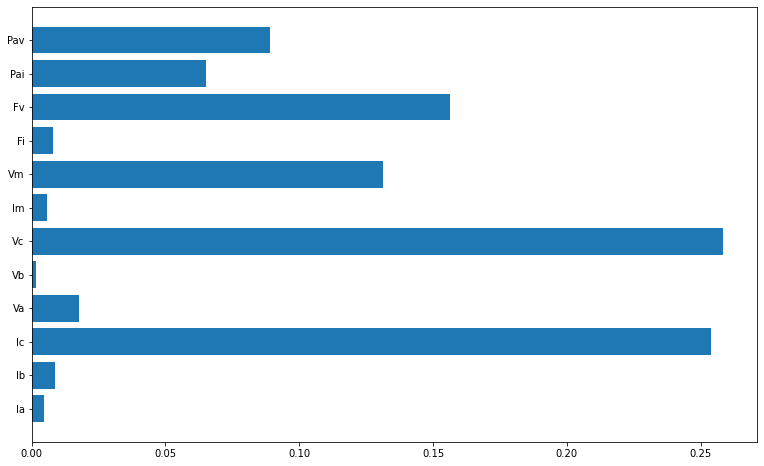

In [ ]:
from sklearn.inspection import permutation_importance
RF.feature_importances_

plt.figure(figsize=(13, 8))
plt.barh(features, RF.feature_importances_)
fig, ax = plt.subplots()

## Shap Analysis

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.6 MB/s eta 0:00:00


### DT

In [ ]:
# compute SHAP values
import shap
explainer_DT = shap.TreeExplainer(DT)
shap_values = explainer_DT.shap_values(x)

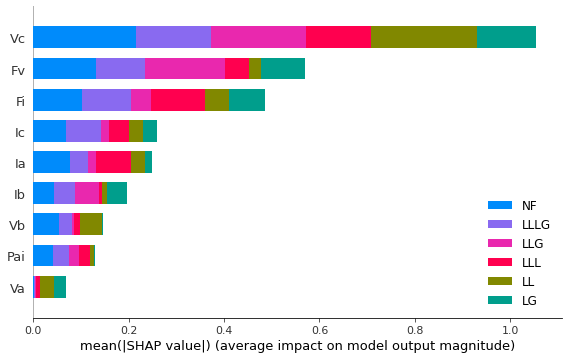

In [ ]:
class_names = ['NF', 'LG', 'LL', 'LLG', 'LLL', 'LLLG']
shap.summary_plot(shap_values, x.values, plot_type="bar", class_names= class_names, feature_names = x.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


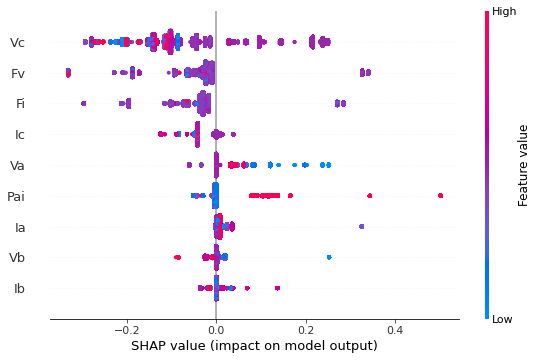

In [ ]:
shap.summary_plot(shap_values[1], x.values, feature_names = x.columns)

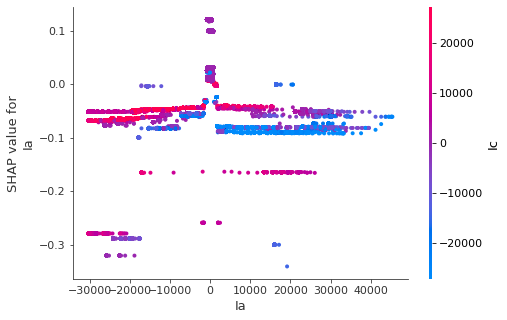

In [ ]:
shap.dependence_plot(0, shap_values[0], x.values, feature_names=x.columns)

In [ ]:
i= 70
# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer_DT.expected_value[0], shap_values[0][i], x.values[i], feature_names = x.columns)

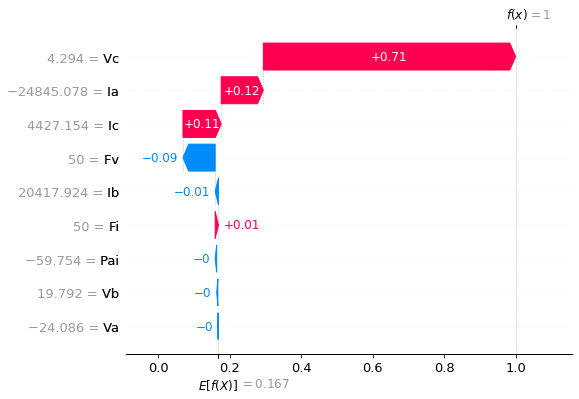

In [ ]:
row = 8
# load JS visualization code to notebook
shap.initjs()

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=explainer_DT.expected_value[0], data=x_test.iloc[row],
                                         feature_names=x_test.columns.tolist()))

### RF

In [ ]:
# compute SHAP values
import shap
explainer_RF = shap.TreeExplainer(RF)
shap_values = explainer_RF.shap_values(x)

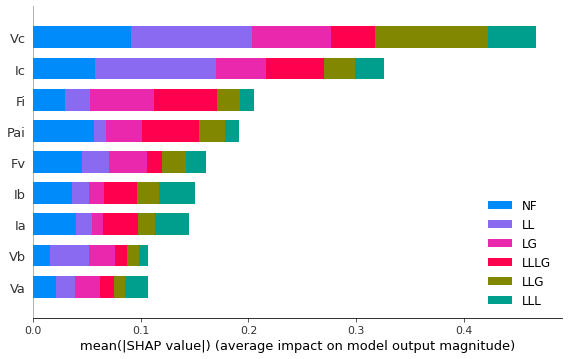

In [ ]:
class_names = ['NF', 'LG', 'LL', 'LLG', 'LLL', 'LLLG']
shap.summary_plot(shap_values, x.values, plot_type="bar", class_names= class_names, feature_names = x.columns)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


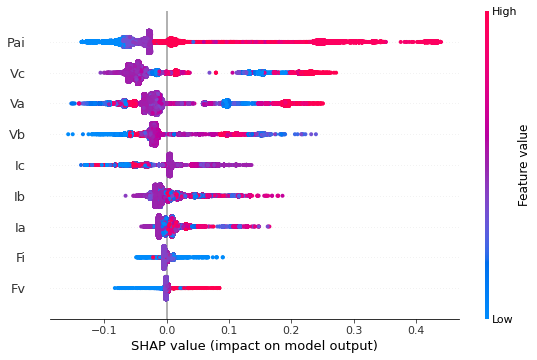

In [ ]:
shap.summary_plot(shap_values[1], x.values, feature_names = x.columns)

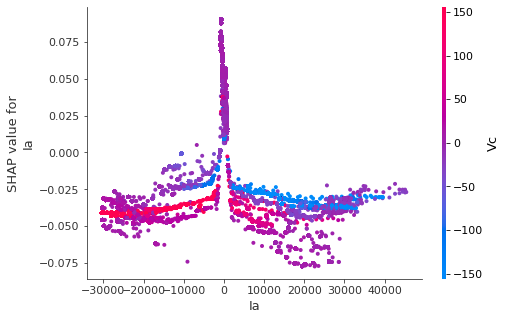

In [ ]:
shap.dependence_plot(0, shap_values[0], x.values, feature_names=x.columns)

In [ ]:
i=303
# load JS visualization code to notebook
shap.initjs()

shap.force_plot(explainer_RF.expected_value[0], shap_values[0][i], x.values[i], feature_names = x.columns)

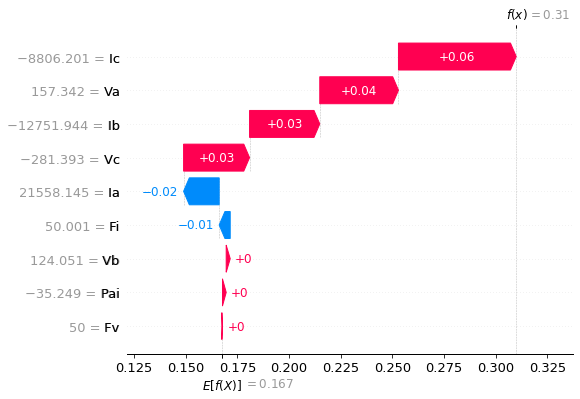

In [ ]:
row = 12
# load JS visualization code to notebook
shap.initjs()

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=explainer_RF.expected_value[0], data=x_test.iloc[row],
                                         feature_names=x_test.columns.tolist()))

## K-NN

In [ ]:
import shap

# Get the model explainer object
explainer_KNN = shap.KernelExplainer(knnclassifier.predict_proba, x_train)

In [ ]:
KNN_shap_values = explainer_KNN.shap_values(x.iloc[0,:])

In [ ]:
# Generate a force plot for this first observation using the derived shap values
shap.initjs()
shap.force_plot(explainer_KNN.expected_value[5], KNN_shap_values[5], x.iloc[0,:])